In [1]:
import pandas as pd

def ler_arquivo_dat(nome_arquivo):
    with open(nome_arquivo, "r") as arquivo:
        conteudo = arquivo.readlines()  # Lê todas as linhas do arquivo
        
        # Encontra a primeira linha contendo START_VARIABLE = nome_variavel
        var = ""
        for linha in conteudo:
            if "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
                break  # Sai do loop quando encontrar a linha desejada
        
        # Procura por linhas começando com SIZES = e adiciona as variáveis ao array
        variaveis = []
        for linha in conteudo:
            if "SIZES" in linha:
                quantidade = int(linha.split("=")[1])
                for i in range(1, quantidade + 1):
                    variaveis.append(f"{var}{i}")
            elif "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
            if "EOF" in linha:
                break  # Sai do loop quando encontrar EOF
        
        # Cria um dataframe pandas a partir das linhas restantes do arquivo
        dados = [linha.strip().split(",") for linha in conteudo if len(linha.strip().split(",")) == 11]
        df = pd.DataFrame(dados, columns=variaveis)
        return df

# Chamada da função para ler o arquivo .dat e criar o dataframe
#df = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")


In [15]:
for col in ['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL2', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3','B_vec_xyz_gse__C1_CP_FGM_FULL1', 'B_vec_xyz_gse__C1_CP_FGM_FULL2', 'B_vec_xyz_gse__C1_CP_FGM_FULL3']:
    df[col] = df[col].astype(float)

In [2]:
import numpy as np
import pandas as pd

# Carregar os datasets
data_1 = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")
data_2 = ler_arquivo_dat("utils/C2_CP_FGM_FULL/C2_CP_FGM_FULL__20010213_104200_20010213_105000_V140306.cef")
data_3 = ler_arquivo_dat("utils/C3_CP_FGM_FULL/C3_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")
data_4 = ler_arquivo_dat("utils/C4_CP_FGM_FULL/C4_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")

# Extrair valores relevantes dos datasets


In [3]:
data_2.columns = data_1.columns
data_3.columns = data_1.columns
data_4.columns = data_1.columns


In [4]:
for col in data_1.columns:
    try:
        data_1[col] = data_1[col].astype(float)
        data_2[col] = data_2[col].astype(float)
        data_3[col] = data_3[col].astype(float)
        data_4[col] = data_4[col].astype(float)
    except:
        pass

In [5]:
data_1 = data_1[:len(data_2)]
data_1

,time_tags__C1_CP_FGM_FULL1,half_interval__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL2,B_vec_xyz_gse__C1_CP_FGM_FULL3,B_mag__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL2,sc_pos_xyz_gse__C1_CP_FGM_FULL3,range__C1_CP_FGM_FULL1,tm__C1_CP_FGM_FULL1
0,2001-02-13T10:42:00.015Z,0.02231,5.113,-7.599,-1.399,9.265,99738.7,14388.7,-29831.2,2.0,22 $
1,2001-02-13T10:42:00.060Z,0.02231,5.090,-7.587,-1.362,9.237,99738.6,14388.7,-29831.3,2.0,22 $
2,2001-02-13T10:42:00.104Z,0.02231,5.107,-7.577,-1.387,9.242,99738.6,14388.7,-29831.3,2.0,22 $
3,2001-02-13T10:42:00.149Z,0.02231,5.094,-7.576,-1.385,9.234,99738.5,14388.6,-29831.4,2.0,22 $
4,2001-02-13T10:42:00.193Z,0.02231,5.060,-7.551,-1.382,9.195,99738.5,14388.6,-29831.4,2.0,22 $
...,...,...,...,...,...,...,...,...,...,...,...
10757,2001-02-13T10:49:59.777Z,0.02231,-2.179,7.030,-1.407,7.493,99217.6,14068.4,-30233.0,2.0,22 $
10758,2001-02-13T10:49:59.822Z,0.02231,-2.200,7.041,-1.339,7.497,99217.6,14068.4,-30233.0,2.0,22 $
10759,2001-02-13T10:49:59.867Z,0.02231,-2.185,7.024,-1.282,7.467,99217.5,14068.4,-30233.1,2.0,22 $
10760,2001-02-13T10:49:59.911Z,0.02231,-2.139,7.011,-1.301,7.444,99217.5,14068.3,-30233.1,2.0,22 $


/home/bruno/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Axes: >

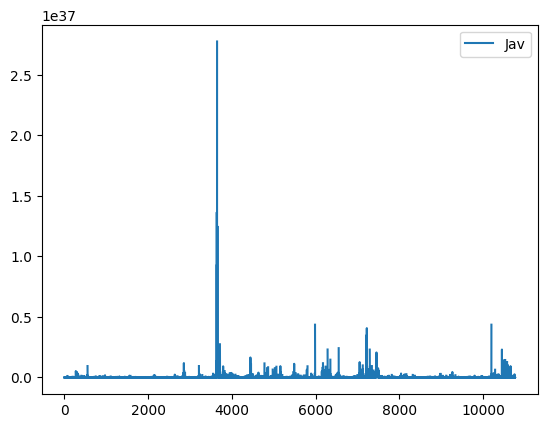

In [20]:
import pandas as pd
import numpy as np

# Define cross-product operation
def cross_product(df_a, df_b):
    cross_product = np.cross(df_a.values, df_b.values)
    return pd.DataFrame(cross_product, columns=df_a.columns, index=df_a.index)

# Define dot-product operation
def dot_product(df_a, df_b):
    dot_product = np.einsum('ij,ij->i', df_a.values, df_b.values)
    return pd.Series(dot_product, index=df_a.index)

# Define main function to calculate current density using curlometer technique
def curlometer(spacecraft1, spacecraft2, spacecraft3, spacecraft4):

    # Define magnetic permeability constant
    mu0 = 4*np.pi*10**-7

    # Define vector and magnetic difference calculations
    def calculate_diff_vectors(s_i, s_j):

        r_ij = s_i[['sc_pos_xyz_gse__C1_CP_FGM_FULL1','sc_pos_xyz_gse__C1_CP_FGM_FULL2','sc_pos_xyz_gse__C1_CP_FGM_FULL3']] - \
               s_j[['sc_pos_xyz_gse__C1_CP_FGM_FULL1','sc_pos_xyz_gse__C1_CP_FGM_FULL2','sc_pos_xyz_gse__C1_CP_FGM_FULL3']]

        B_ij = s_i[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2','B_vec_xyz_gse__C1_CP_FGM_FULL3']] - \
               s_j[['B_vec_xyz_gse__C1_CP_FGM_FULL1','B_vec_xyz_gse__C1_CP_FGM_FULL2','B_vec_xyz_gse__C1_CP_FGM_FULL3']]

        return r_ij, B_ij 

    # Calculate vector and magnetic differences between each pair of satellites
    r12, B12 = calculate_diff_vectors(spacecraft1, spacecraft2)
    r13, B13 = calculate_diff_vectors(spacecraft1, spacecraft3)
    r14, B14 = calculate_diff_vectors(spacecraft1, spacecraft4)
    r23, B23 = calculate_diff_vectors(spacecraft2, spacecraft3)
    r24, B24 = calculate_diff_vectors(spacecraft2, spacecraft4)
    r34, B34 = calculate_diff_vectors(spacecraft3, spacecraft4)

    # Calculate the average current density for each surface of the tetrahedron
    J123 = (dot_product(B12, r23) - dot_product(B23, r12)) / (mu0 * dot_product(r12, cross_product(r13, r23)))
    J124 = (dot_product(B12, r24) - dot_product(B24, r12)) / (mu0 * dot_product(r12, cross_product(r14, r24)))
    J134 = (dot_product(B13, r34) - dot_product(B34, r13)) / (mu0 * dot_product(r13, cross_product(r14, r34)))
    J234 = (dot_product(B23, r34) - dot_product(B34, r23)) / (mu0 * dot_product(r23, cross_product(r24, r34)))

    # Calculate the average current density for the entire tetrahedron
    J_av = np.mean([J123, J124, J134, J234], axis=0) 

    return pd.DataFrame(J_av, columns=['Jav'])

curlometer(data_1, data_2, data_3, data_4).plot()

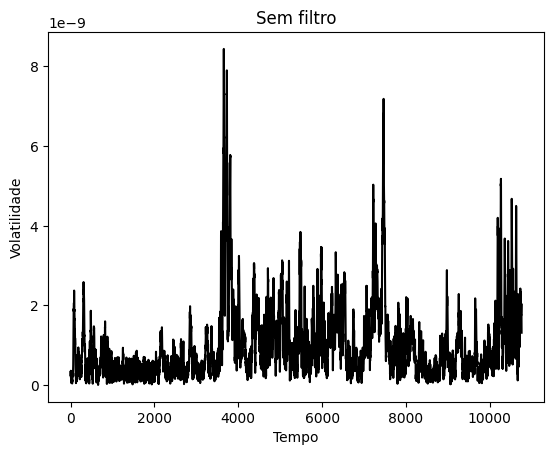

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        # Handle specific formatting issues if necessary
        return float(s.replace('D', 'E'))
current_density = np.loadtxt('utils/current_sheet/current_density.dat', converters={0: convert_to_float})
#x_coords = x_coords * 10e9  
#x_coords = x_coords * 10e9  
# Display the plot
plt.plot(current_density, color="black")
plt.xlabel('Tempo')
plt.ylabel('Volatilidade')

# Set the title of the plot
plt.title('Sem filtro')


plt.show()

In [63]:
data_4[['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3']].values

array([[ 99807.4, -30630. ],
       [ 99807.4, -30630. ],
       [ 99807.3, -30630. ],
       ...,
       [ 99287.6, -31027.2],
       [ 99287.6, -31027.2],
       [ 99287.5, -31027.2]])

In [28]:
[data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]

[array(['99738.7', '99738.6', '99738.6', ..., '99217.5', '99217.4',
        '99217.4'], dtype=object),
 array(['13721.3', '13721.3', '13721.3', ..., '13406.7', '13406.6',
        '13406.6'], dtype=object),
 array(['-30025.2', '-30025.2', '-30025.3', ..., '-30423.1', '-30423.1',
        '-30423.2'], dtype=object)]

In [40]:
delta_r_values = np.array([
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]
])

delta_b_values = np.array([
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values]
])


In [49]:
delta_r = delta_r_values[:, :, i].astype(float)
delta_b = delta_b_values[:, :, i].astype(float)

densidade = []
# Processar os valores para cada ponto no tempo
for i in range(len(data_1)):
    
    rot_b = curlometer(delta_r, delta_b)
    current_density = estimate_current_density(delta_r, delta_b)
    
    print(f"Tempo: {data_1['time_tags__C1_CP_FGM_FULL1'].iloc[i]}")
    print("Rotacional do campo magnético:")
    print(rot_b)
    print("Densidade média da corrente:")
    print(current_density)
    densidade.append(current_density)
    print("---")


AxisError: axisa: axis -1 is out of bounds for array of dimension 0

In [1]:
import numpy as np

def curlometer(delta_r, delta_b):
    # Calcula o rotacional do campo magnético
    rot_b = np.cross(delta_r, delta_b) / np.linalg.norm(delta_r)**2
    
    return rot_b

def estimate_current_density(delta_r, delta_b):
    # Calcula a densidade da corrente média usando a lei de Ampère
    mu_0 = 4 * np.pi * 1e-7
    j = np.zeros(3)
    
    for i in range(3):
        for j in range(3):
            if i != j:
                j += mu_0 * np.dot(j, np.cross(delta_r[i], delta_r[j])) / (np.linalg.norm(delta_r[i])**2)
    
    return j

# Exemplo de uso
delta_r = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
delta_b = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])

rot_b = curlometer(delta_r, delta_b)
current_density = estimate_current_density(delta_r, delta_b)

print("Rotacional do campo magnético:")
print(rot_b)

print("Densidade média da corrente:")
print(current_density)


Rotacional do campo magnético:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Densidade média da corrente:
2
